# <CENTER> TV PRICE PREDICTION

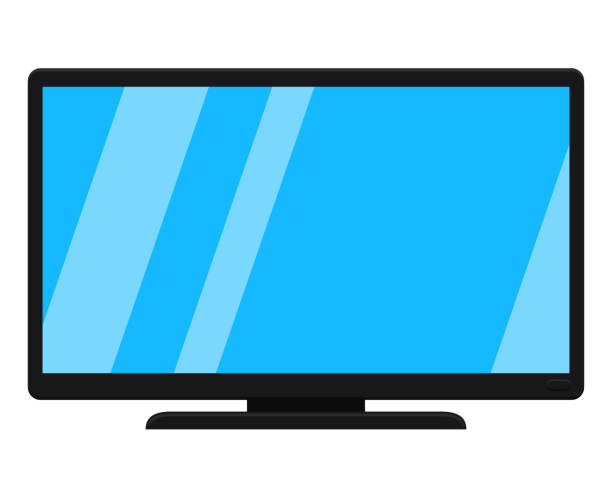

# <CENTER> IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('TV_Final.csv')

In [3]:
df

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3
...,...,...,...,...,...,...,...
907,SONY,Full HD LED,43,44999,57900,Linux,4.4
908,SONY,Full HD LED,40,41499,51900,Linux,4.6
909,SONY,Ultra HD LED,65,149990,184990,Linux,4.3
910,SONY,HD LED,32,32900,32900,Linux,4.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  901 non-null    object 
 6   Rating            692 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


In [5]:
df.rename(columns={'Selling Price':'Selling_Price','Original Price':'Original_Price','Operating System':'Operating_System'},inplace=True)

In [6]:
df.shape

(912, 7)

In [7]:
df.describe()

,Size,Selling_Price,Original_Price,Rating
count,912.000000,912.000000,912.000000,692.000000
mean,45.942982,59358.606360,81975.213816,4.234104
std,12.316492,65866.677856,84823.568826,0.366694
min,17.000000,4849.000000,6999.000000,2.000000
25%,32.000000,19797.500000,28990.000000,4.100000
50%,43.000000,36990.000000,52900.000000,4.300000
75%,55.000000,67064.250000,99900.000000,4.400000
max,85.000000,499990.000000,549990.000000,5.000000


In [8]:
df.isnull().mean()*100

Brand                0.000000
Resolution           0.000000
Size                 0.000000
Selling_Price        0.000000
Original_Price       0.000000
Operating_System     1.206140
Rating              24.122807
dtype: float64

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

18

In [11]:
df.drop_duplicates(inplace=True)

# BOXPLOT

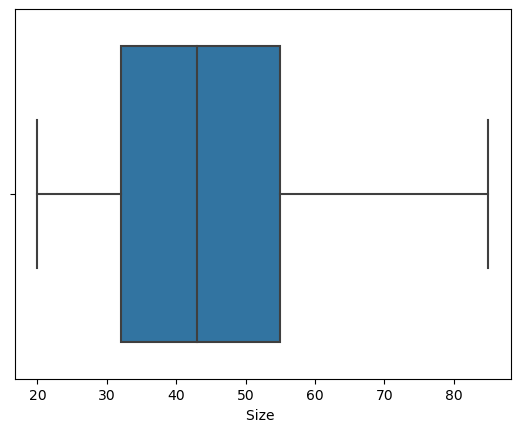

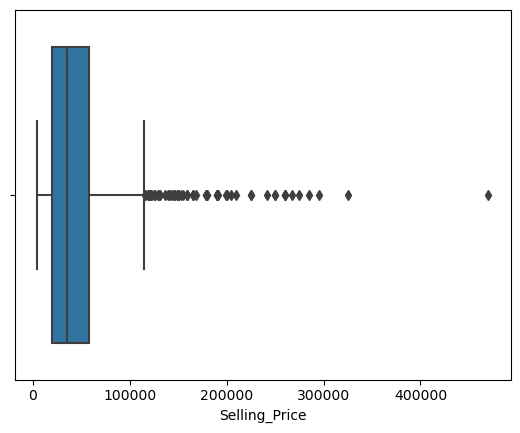

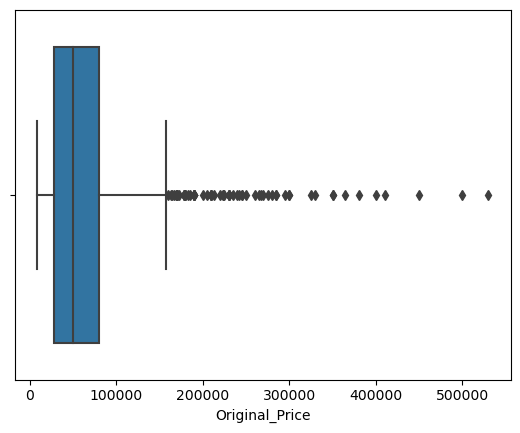

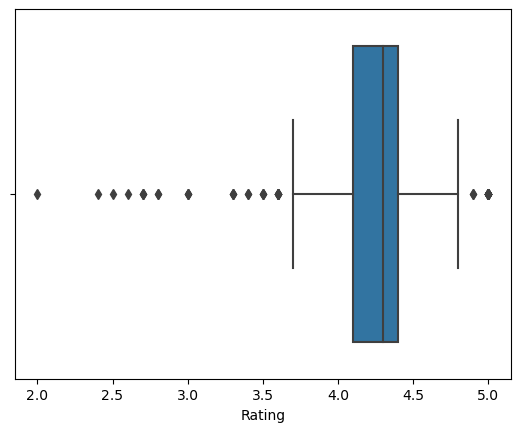

In [12]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(x=df[i])
        plt.show();

# KDEPLOT 

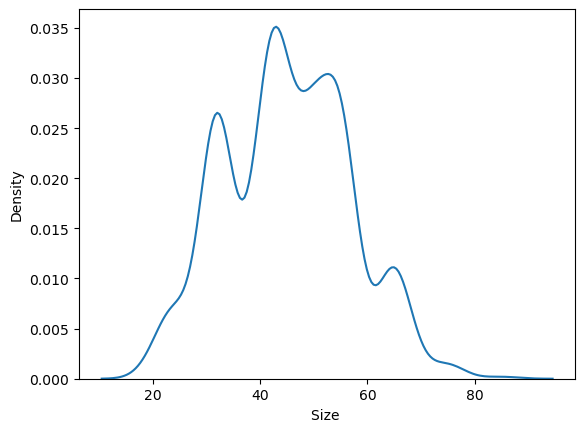

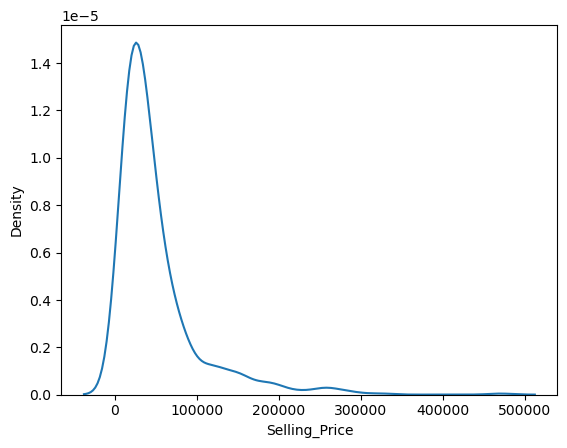

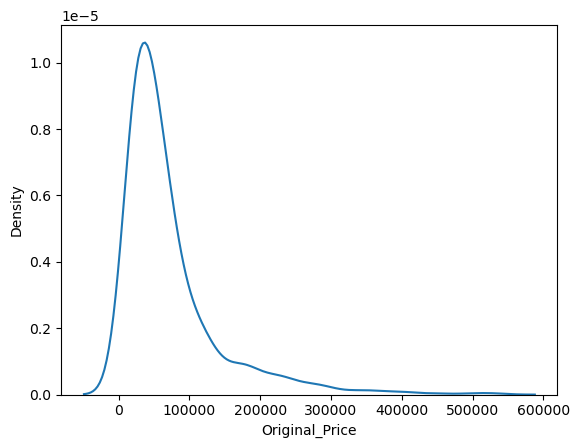

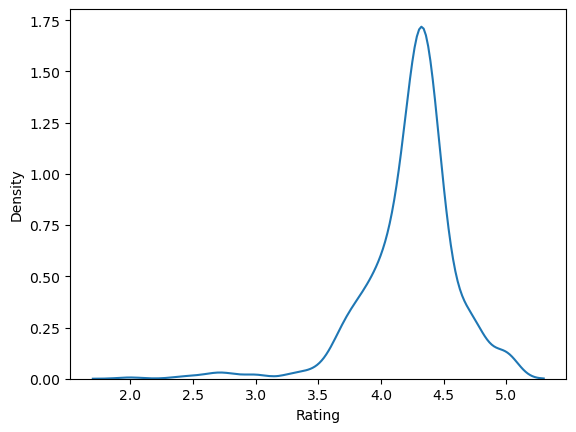

In [13]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();

# HISTOGRAM

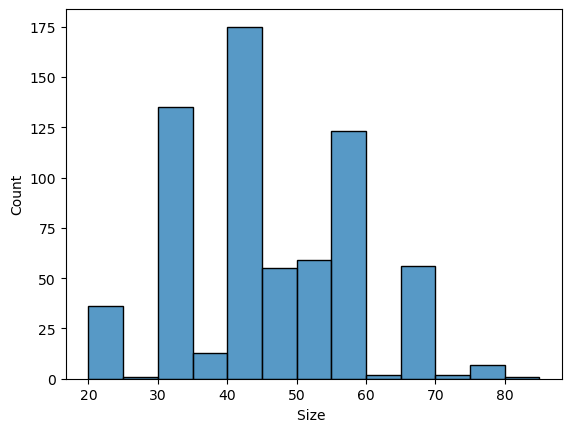

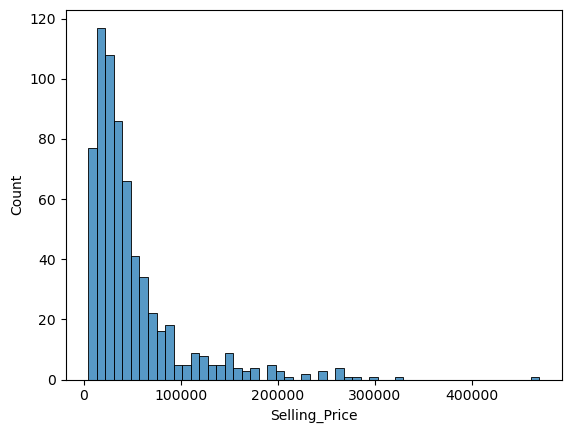

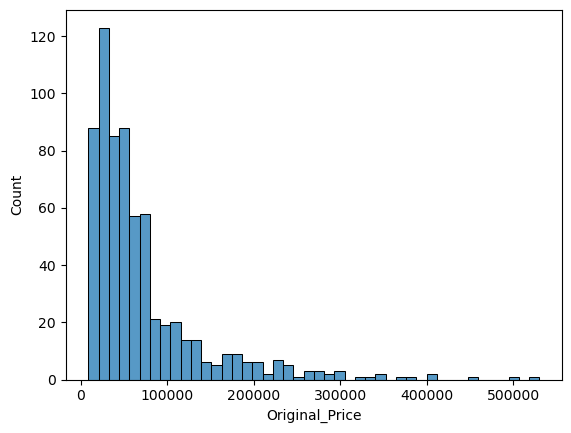

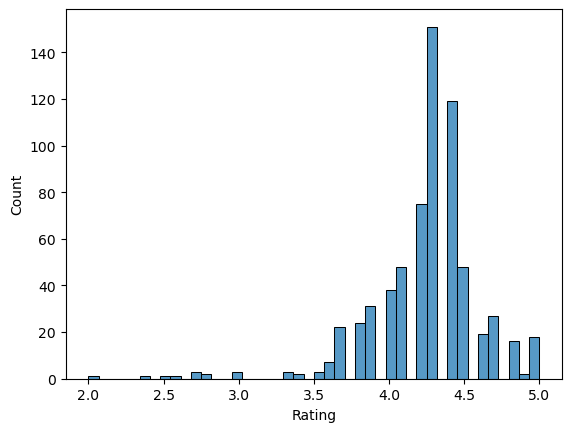

In [14]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i])
        plt.show();

# <center>UNIVARIATE ANALYSIS

### BARPLOT

<AxesSubplot:>

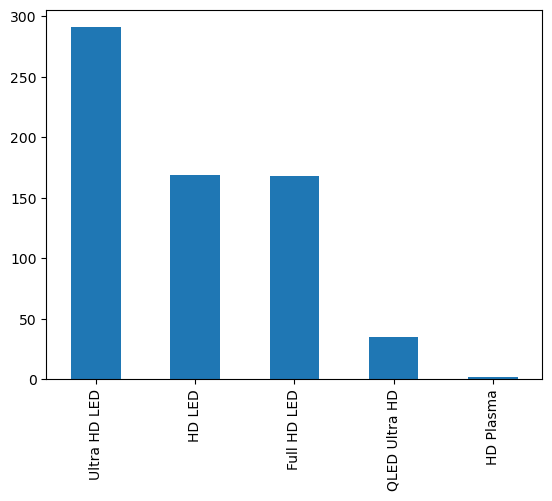

In [16]:
df.Resolution.value_counts().plot.bar()

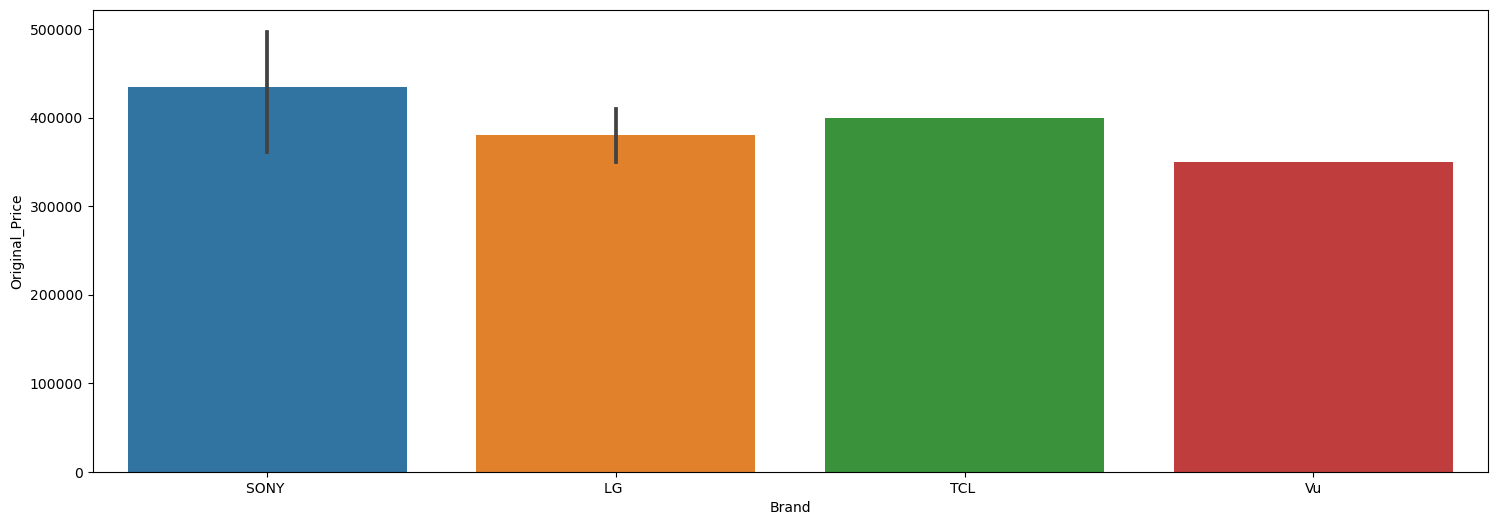

In [17]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Brand', y='Original_Price', data=df.sort_values(by='Original_Price', ascending=False)[:10]);

### PIE CHART

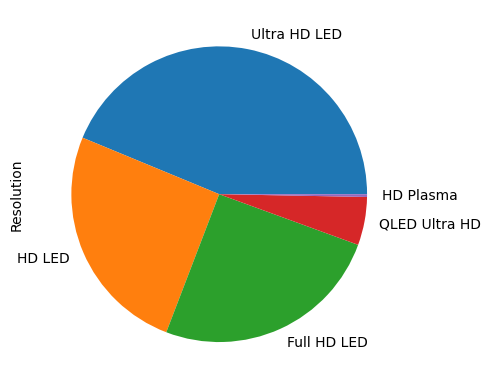

In [18]:
df.Resolution.value_counts().plot.pie();

## LINEPLOT

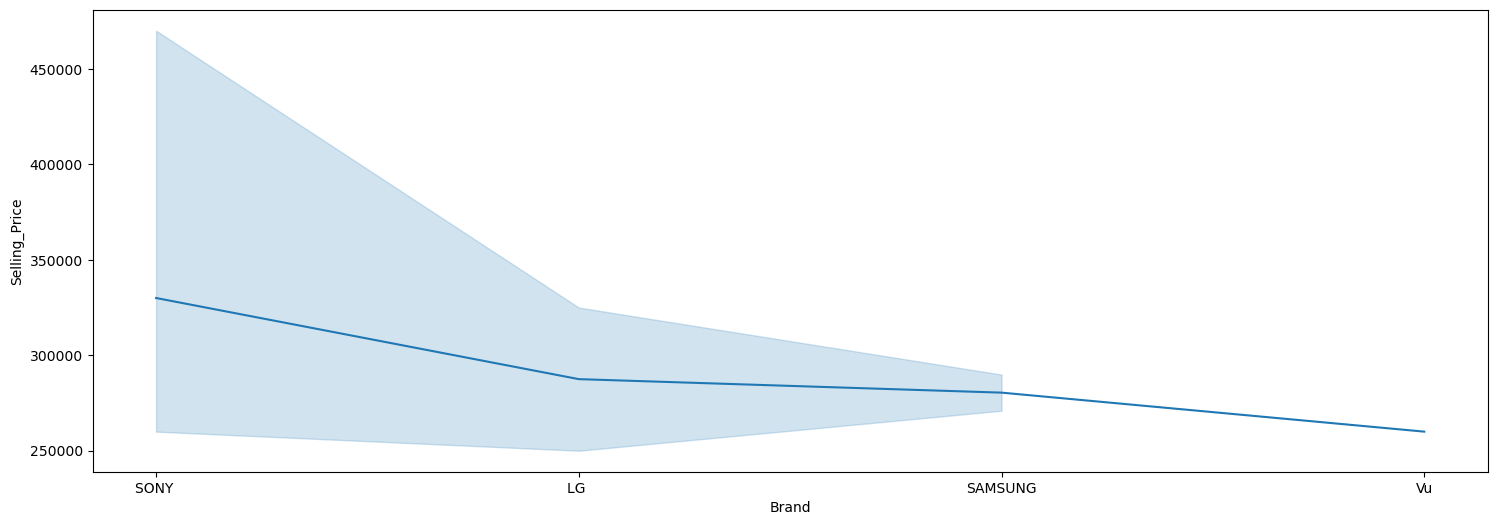

In [20]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Brand', y='Selling_Price', data=df.sort_values(by='Selling_Price', ascending=False)[:10]);

# OUTLIER TREATMENT

In [21]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [22]:
for column in df.columns:
    if df[column].dtype!='object':
       UL,LL=outlier_limit(df[column])
       df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

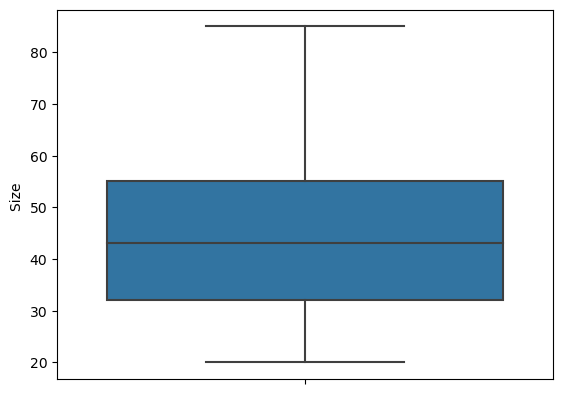

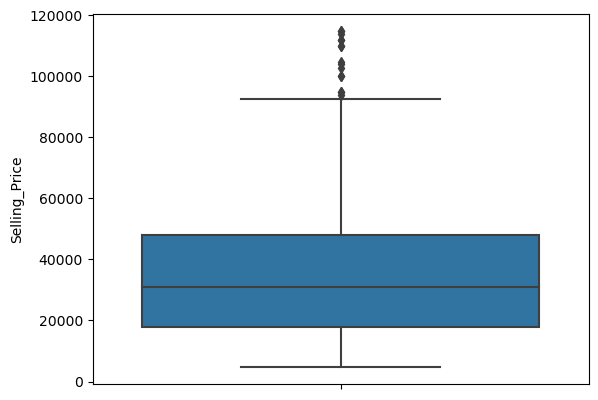

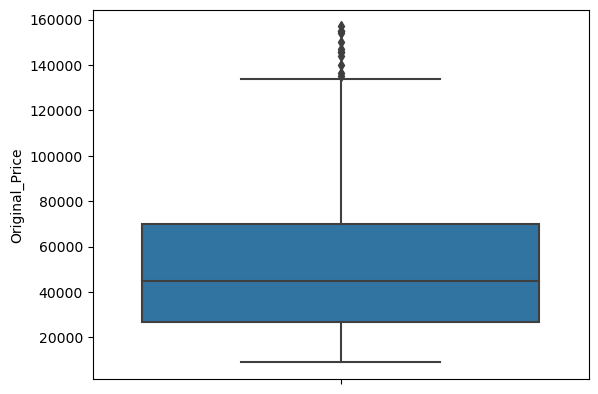

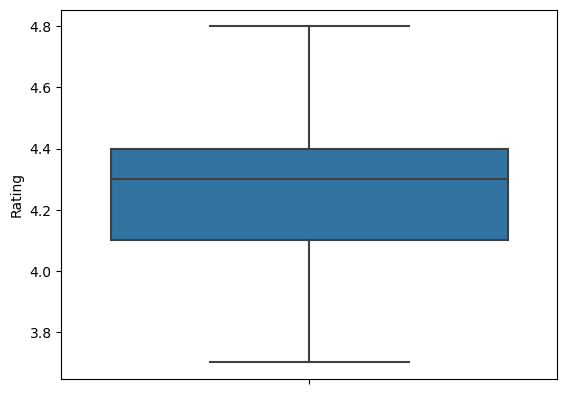

In [23]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

In [24]:
df.dropna(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             555 non-null    object 
 1   Resolution        555 non-null    object 
 2   Size              555 non-null    float64
 3   Selling_Price     555 non-null    float64
 4   Original_Price    555 non-null    float64
 5   Operating_System  555 non-null    object 
 6   Rating            555 non-null    float64
dtypes: float64(4), object(3)
memory usage: 34.7+ KB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             555 non-null    object 
 1   Resolution        555 non-null    object 
 2   Size              555 non-null    float64
 3   Selling_Price     555 non-null    float64
 4   Original_Price    555 non-null    float64
 5   Operating_System  555 non-null    object 
 6   Rating            555 non-null    float64
dtypes: float64(4), object(3)
memory usage: 34.7+ KB


# <center>USING LABELENCODING

In [27]:
cols=['Brand','Resolution','Operating_System']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)

In [28]:
df

,Brand,Resolution,Size,Selling_Price,Original_Price,Operating_System,Rating
0,43,4,55.0,37999.0,54990.0,4,4.3
1,42,3,55.0,52999.0,129990.0,0,4.4
2,48,1,32.0,13999.0,17999.0,0,4.3
3,26,1,32.0,14999.0,19999.0,0,4.4
4,48,1,32.0,12999.0,21999.0,0,4.3
...,...,...,...,...,...,...,...
906,36,4,49.0,54999.0,114900.0,2,4.6
907,36,0,43.0,44999.0,57900.0,2,4.4
908,36,0,40.0,41499.0,51900.0,2,4.6
910,36,1,32.0,32900.0,32900.0,2,4.4


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             555 non-null    int32  
 1   Resolution        555 non-null    int32  
 2   Size              555 non-null    float64
 3   Selling_Price     555 non-null    float64
 4   Original_Price    555 non-null    float64
 5   Operating_System  555 non-null    int32  
 6   Rating            555 non-null    float64
dtypes: float64(4), int32(3)
memory usage: 28.2 KB


# <center> CHECKING CORRELATION USING HEAT MAP

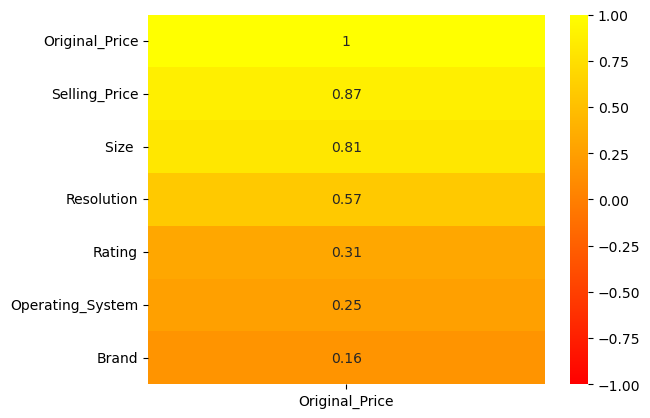

In [30]:
sns.heatmap(df.corr()[['Original_Price']].sort_values(by="Original_Price",
                                                ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

### SELECTING X & Y

In [31]:
x=df[['Selling_Price','Size ','Resolution']].values
y=df[['Original_Price']].values

## SCALING

In [32]:
sc=StandardScaler()

In [33]:
x=sc.fit_transform(x)

## CROSS VALIDATION

In [34]:
models={
    'LinearRegression':LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [35]:
for name,model in models.items():
    scores=cross_val_score(model, x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average =np.mean(rmse)
    print("AVERAGE RMSE:",rmse_average)
    print("*"*100)

cross validation model:LinearRegression
AVERAGE RMSE: 12599.455763425238
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 12597.01482305464
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 57235.506753369526
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 16469.375493627616
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 13226.739103738038
****************************************************************************************************
cross validation model:AdaBoostRegressor
AVERAGE RMSE: 14091.202772100927
*************************************************************

## MODEL BUILDING USING RIDGE

In [36]:
model=Ridge()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
model.fit(x_train,y_train)

Ridge()

In [39]:
y_pred=model.predict(x)

## PREDICTING Y

In [40]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,54990.0,67572.194174
1,129990.0,78523.844662
2,17999.0,20852.145525
3,19999.0,21713.033358
4,21999.0,19991.257693


## SCATTERPLOT

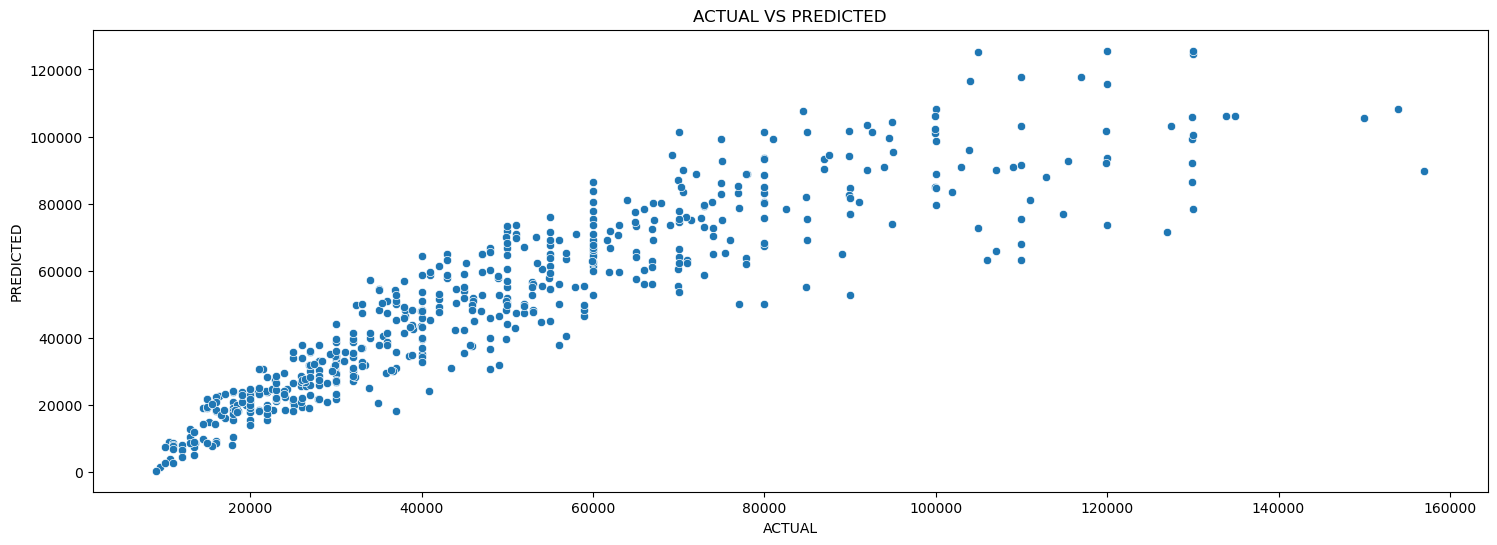

In [41]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");